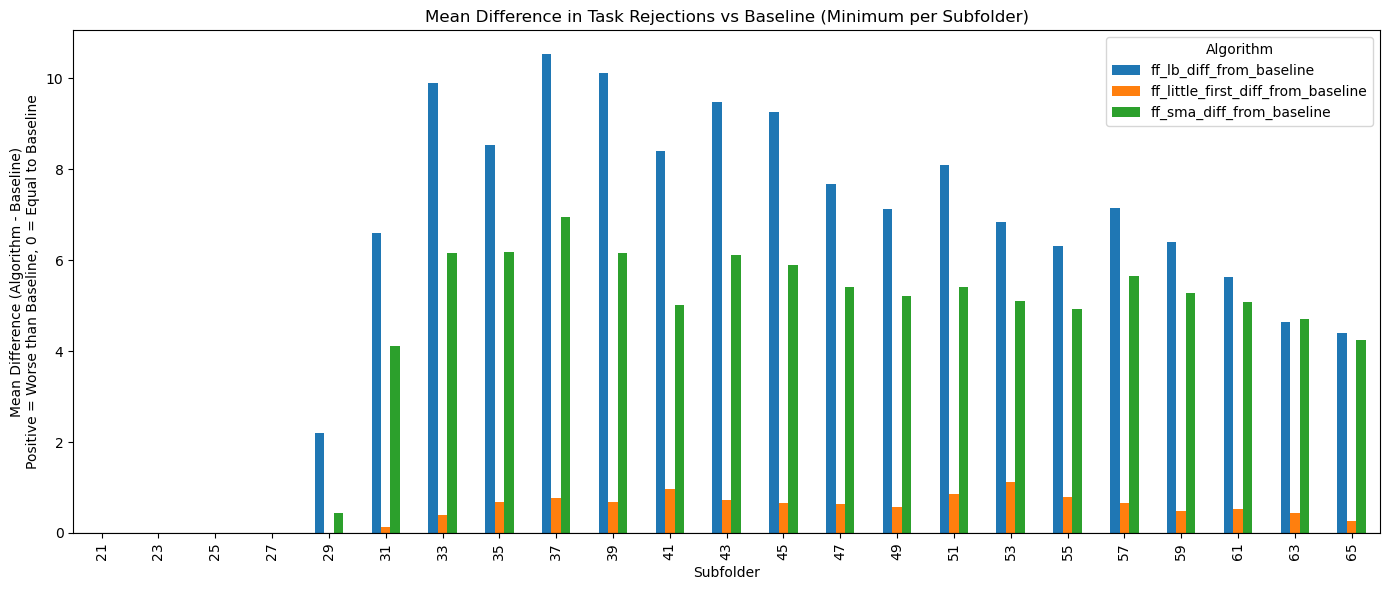

=== Best Algorithm per Subfolder ===
   subfolder   Best Algorithm  Mean Rejections
0         21            ff_lb             0.00
1         23            ff_lb             0.00
2         25            ff_lb             0.00
3         27            ff_lb             0.00
4         29  ff_little_first             0.00
5         31  ff_little_first             0.38
6         33  ff_little_first             3.62
7         35  ff_little_first             8.08
8         37  ff_little_first            13.00
9         39  ff_little_first            16.29
10        41  ff_little_first            22.05
11        43  ff_little_first            25.24
12        45  ff_little_first            27.81
13        47  ff_little_first            32.72
14        49  ff_little_first            35.99
15        51  ff_little_first            39.45
16        53  ff_little_first            43.80
17        55  ff_little_first            45.16
18        57  ff_little_first            49.06
19        59  ff_little

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "all_taskset_result.csv"
data = pd.read_csv(file_path)

data['subfolder'] = data['taskset'].apply(lambda x: x.split('/')[1])

algos = ['ff_lb','ff_little_first','ff_sma']

data['baseline'] = data[algos].min(axis=1)

for col in algos:
    data[f'{col}_diff_from_baseline'] = data[col] - data['baseline']

mean_diffs_by_subfolder = data.groupby('subfolder')[
    [f'{col}_diff_from_baseline' for col in algos]
].mean().reset_index()

mean_diffs_by_subfolder.set_index('subfolder', inplace=True)
ax = mean_diffs_by_subfolder.plot(kind='bar', figsize=(14,6))
plt.axhline(0, color='black', linewidth=0.8)
plt.title('Mean Difference in Task Rejections vs Baseline (Minimum per Subfolder)')
plt.ylabel('Mean Difference (Algorithm - Baseline)\nPositive = Worse than Baseline, 0 = Equal to Baseline')
plt.xlabel('Subfolder')
plt.legend(title='Algorithm')
plt.tight_layout()
plt.show()

mean_rejections = data.groupby('subfolder')[algos].mean()

best_alg_per_subfolder = mean_rejections.idxmin(axis=1).reset_index()
best_val_per_subfolder = mean_rejections.min(axis=1).reset_index()

summary_best = best_alg_per_subfolder.rename(columns={0:'Best Algorithm'})
summary_best['Mean Rejections'] = best_val_per_subfolder[0]

print("=== Best Algorithm per Subfolder ===")
print(summary_best)

overall_means = data[algos].mean()

print("\n=== Overall Mean Rejections (Lower = Better) ===")
print(overall_means)